In [15]:
!pip install --upgrade pandas
!pip install --upgrade numpy

Requirement already up-to-date: pandas in c:\users\lenovo\anaconda3\lib\site-packages (2.0.3)
Requirement already up-to-date: numpy in c:\users\lenovo\anaconda3\lib\site-packages (1.24.4)


In [17]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LinearRegression
import math

# import plotly.express as px
from sklearn.metrics import mean_absolute_error

ImportError: cannot import name 'is_numpy_dev' from 'pandas.compat' (C:\Users\Lenovo\anaconda3\lib\site-packages\pandas\compat\__init__.py)

In [2]:
# Importing the dataset
dataset = pd.read_csv('CVD_cleaned.csv')
# print(dataset.head())

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Skin_Cancer                   308854 non-null  object 
 4   Other_Cancer                  308854 non-null  object 
 5   Depression                    308854 non-null  object 
 6   Diabetes                      308854 non-null  object 
 7   Arthritis                     308854 non-null  object 
 8   Sex                           308854 non-null  object 
 9   Smoking_History               308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  int64  
 12  Weight_(kg)                   308854 non-nul

In [4]:
test3 = dataset.isna().sum() / len(dataset)

In [5]:
Drop = list(test3[test3 > 0.5].index)

In [6]:
Drop

[]

In [7]:
# dataset.describe().T.round(2)

In [8]:
dataset = dataset[dataset["Heart_Disease"] != "M"]

In [9]:
disease_map = {
    "Yes": 1,
    "No": 2,
}
dataset["Heart_Disease"] = dataset["Heart_Disease"].replace(disease_map)

In [10]:
dataset["General_Health"].fillna("NA").value_counts()

Very Good    110395
Good          95364
Excellent     55954
Fair          35810
Poor          11331
Name: General_Health, dtype: int64

In [11]:
dataset["General_Health"].value_counts()

Very Good    110395
Good          95364
Excellent     55954
Fair          35810
Poor          11331
Name: General_Health, dtype: int64

In [12]:
dataset["General_Health"].unique()

array(['Poor', 'Very Good', 'Good', 'Fair', 'Excellent'], dtype=object)

In [13]:
dataset["General_Health"] = dataset["General_Health"].replace(
    {1: "Poor", 2: "Very Good", 3: "Good", 4: "Fair", 5: "Excellent"}
)

In [14]:
dataset["Checkup"].value_counts()

Within the past year       239371
Within the past 2 years     37213
Within the past 5 years     17442
5 or more years ago         13421
Never                        1407
Name: Checkup, dtype: int64

In [15]:
dataset["Checkup"] = dataset["Checkup"].replace(
    {4: "within the past year", 3: "within the past 2 years", 2: "within the past 5 years", 1: "5 or more years ago", 0: "Never"}
)

In [16]:
dataset["Checkup"].unique()

array(['Within the past 2 years', 'Within the past year',
       '5 or more years ago', 'Within the past 5 years', 'Never'],
      dtype=object)

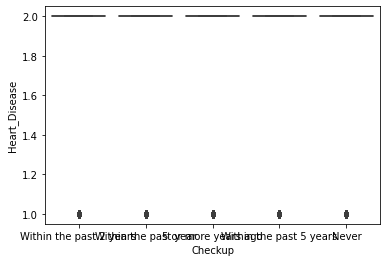

In [17]:
import seaborn as sns
sns.boxplot(dataset["Checkup"], dataset["Heart_Disease"])

In [18]:
from category_encoders import LeaveOneOutEncoder
dataset = LeaveOneOutEncoder().fit_transform(dataset, dataset["Heart_Disease"])

In [19]:
Data = dataset.drop(
    columns=[
        "Checkup",
        "Exercise",
        "Skin_Cancer",
        "Other_Cancer",
        "Depression",
        "Sex",
        "Height_(cm)",
        "Weight_(kg)",
        "BMI",
        "Alcohol_Consumption",
        "Fruit_Consumption",
        "Green_Vegetables_Consumption",
        "FriedPotato_Consumption",
    ]
)

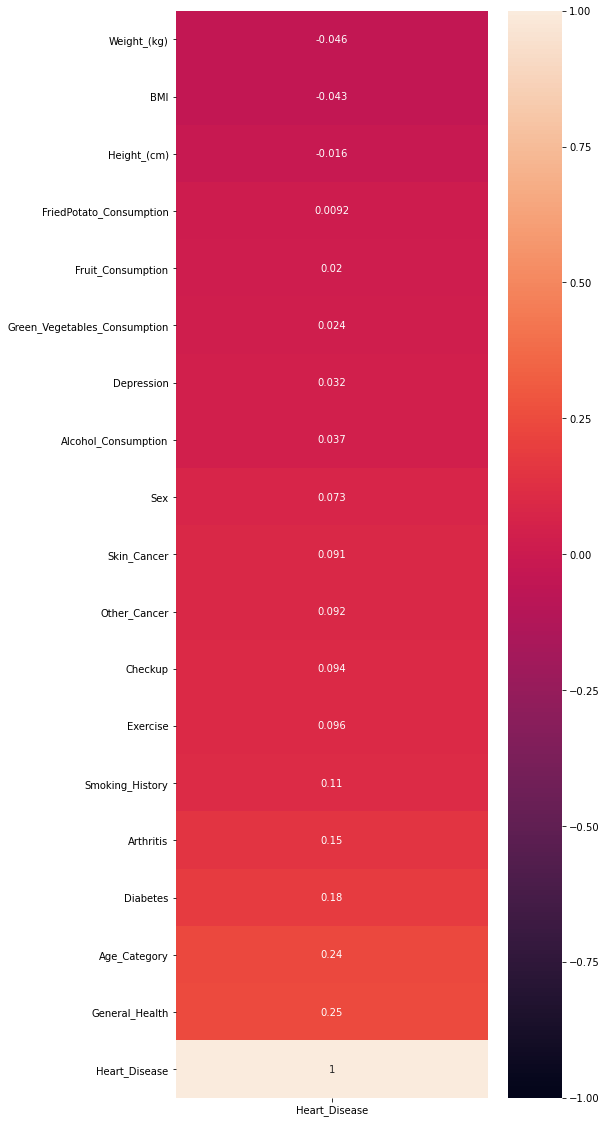

In [20]:
DiseaseCor = dataset.corr()[["Heart_Disease"]].sort_values("Heart_Disease")
plt.figure(figsize=(7, 20))
sns.heatmap(
    DiseaseCor,
    vmin=-1,
    annot=True,
)
plt.show()

In [21]:
DiseaseCor

,Heart_Disease
Weight_(kg),-0.045875
BMI,-0.042666
Height_(cm),-0.015780
FriedPotato_Consumption,0.009227
Fruit_Consumption,0.020055
Green_Vegetables_Consumption,0.024043
Depression,0.032312
Alcohol_Consumption,0.036569
Sex,0.072505
Skin_Cancer,0.090753


Columns with correlation more than 0.1 can be choosen.

In [22]:
df1 = dataset[DiseaseCor.index]
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Weight_(kg)                   308854 non-null  float64
 1   BMI                           308854 non-null  float64
 2   Height_(cm)                   308854 non-null  int64  
 3   FriedPotato_Consumption       308854 non-null  int64  
 4   Fruit_Consumption             308854 non-null  int64  
 5   Green_Vegetables_Consumption  308854 non-null  int64  
 6   Depression                    308854 non-null  float64
 7   Alcohol_Consumption           308854 non-null  int64  
 8   Sex                           308854 non-null  float64
 9   Skin_Cancer                   308854 non-null  float64
 10  Other_Cancer                  308854 non-null  float64
 11  Checkup                       308854 non-null  float64
 12  Exercise                      308854 non-nul

<function matplotlib.pyplot.show(*args, **kw)>

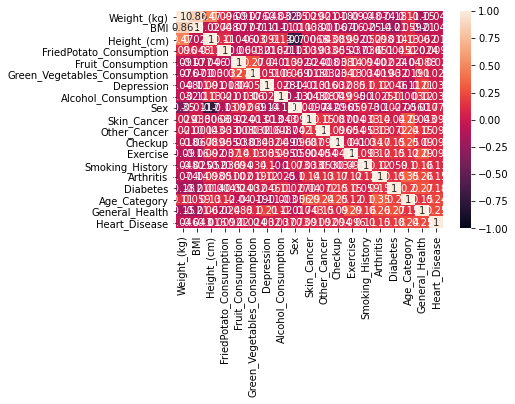

In [23]:
sns.heatmap(df1.corr(), vmin=-1, annot=True)
plt.show

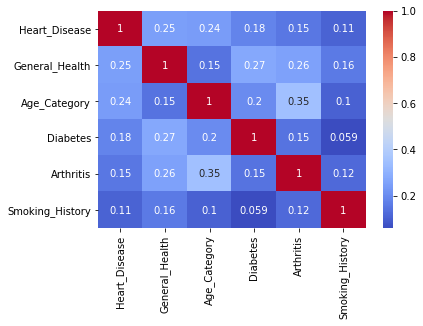

In [24]:
df = pd.DataFrame(dataset)
correlation_matrix=df.corr()
n=6
most_correlated_features=correlation_matrix.nlargest(n, 'Heart_Disease')['Heart_Disease'].index
#create a new data frame
selected_features=df[most_correlated_features]
#Generate heat map
heatmap=sns.heatmap(selected_features.corr(), annot=True, cmap='coolwarm')
plt.show()

# Random Forest

In [25]:
df1 = df1.dropna()

In [26]:
df1

,Weight_(kg),BMI,Height_(cm),FriedPotato_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,Depression,Alcohol_Consumption,Sex,Skin_Cancer,Other_Cancer,Checkup,Exercise,Smoking_History,Arthritis,Diabetes,Age_Category,General_Health,Heart_Disease
0,32.66,14.54,150,12,30,16,1.923588,0,1.938213,1.927271,1.927391,1.960631,1.870394,1.883573,1.858989,1.939396,1.853353,1.682083,2
1,77.11,28.29,165,4,30,0,1.923592,0,1.938219,1.927275,1.927395,1.905443,1.870408,1.943428,1.948417,1.791511,1.853386,1.956329,1
2,88.45,33.47,163,16,12,3,1.923588,4,1.938213,1.927271,1.927391,1.905439,1.933299,1.943423,1.948412,1.791486,1.907086,1.956320,2
3,93.44,28.73,180,8,30,30,1.923592,0,1.898612,1.927275,1.927395,1.905443,1.933303,1.943428,1.948417,1.791511,1.818827,1.682171,1
4,88.45,24.37,191,0,8,4,1.923588,0,1.898606,1.927271,1.927391,1.905439,1.870394,1.883573,1.948412,1.939396,1.781949,1.909367,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,81.65,29.05,168,0,30,8,1.923588,4,1.898606,1.927271,1.927391,1.905439,1.933299,1.943423,1.948412,1.939396,1.992706,1.956320,2
308850,69.85,21.48,180,4,15,60,1.923588,8,1.898606,1.927271,1.927391,1.972995,1.933299,1.943423,1.948412,1.791486,1.885652,1.810411,2
308851,61.23,24.69,157,4,40,8,1.901438,4,1.938213,1.927271,1.927391,1.974516,1.933299,1.883573,1.948412,1.963705,1.989092,1.956320,2
308852,79.38,23.73,183,0,30,12,1.923588,3,1.898606,1.927271,1.927391,1.905439,1.933299,1.943423,1.948412,1.939396,1.885652,1.956320,2


In [27]:
# Importing the dataset
dataset = pd.read_csv('CVD_cleaned.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
print(X)
print(y)

[['Poor' 'Within the past 2 years' 'No' ... 30 16 12]
 ['Very Good' 'Within the past year' 'No' ... 30 0 4]
 ['Very Good' 'Within the past year' 'Yes' ... 12 3 16]
 ...
 ['Very Good' '5 or more years ago' 'Yes' ... 40 8 4]
 ['Very Good' 'Within the past year' 'Yes' ... 30 12 0]
 ['Excellent' 'Within the past year' 'Yes' ... 5 12 1]]
['No' 'Yes' 'No' ... 'No' 'No' 'No']


In [28]:
# Taking care of missing data
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, 11:18])
X[:, 11:18] = imputer.transform(X[:, 11:18])
print(X)

[['Poor' 'Within the past 2 years' 'No' ... 30.0 16.0 12.0]
 ['Very Good' 'Within the past year' 'No' ... 30.0 0.0 4.0]
 ['Very Good' 'Within the past year' 'Yes' ... 12.0 3.0 16.0]
 ...
 ['Very Good' '5 or more years ago' 'Yes' ... 40.0 8.0 4.0]
 ['Very Good' 'Within the past year' 'Yes' ... 30.0 12.0 0.0]
 ['Excellent' 'Within the past year' 'Yes' ... 5.0 12.0 1.0]]


In [29]:
# Encoding categorical data
# Encoding the Independent Variable
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
print(X)

[[0.0 0.0 0.0 ... 30.0 16.0 12.0]
 [0.0 0.0 0.0 ... 30.0 0.0 4.0]
 [0.0 0.0 0.0 ... 12.0 3.0 16.0]
 ...
 [0.0 0.0 0.0 ... 40.0 8.0 4.0]
 [0.0 0.0 0.0 ... 30.0 12.0 0.0]
 [1.0 0.0 0.0 ... 5.0 12.0 1.0]]


In [30]:
# Encoding the Target Variable, Heart_Disease
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
print(y)

[0 1 0 ... 0 0 0]


In [31]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
print(X_train)
print(X_test)
print(y_train)
print(y_test)

[[0.0 0.0 0.0 ... 3.0 0.0 5.0]
 [1.0 0.0 0.0 ... 30.0 15.0 0.0]
 [0.0 0.0 1.0 ... 90.0 60.0 0.0]
 ...
 [0.0 0.0 0.0 ... 30.0 90.0 5.0]
 [0.0 0.0 0.0 ... 60.0 20.0 3.0]
 [0.0 0.0 1.0 ... 16.0 24.0 16.0]]
[[0.0 0.0 1.0 ... 5.0 1.0 1.0]
 [0.0 0.0 1.0 ... 28.0 4.0 8.0]
 [0.0 0.0 0.0 ... 40.0 40.0 0.0]
 ...
 [0.0 0.0 1.0 ... 5.0 12.0 4.0]
 [0.0 0.0 1.0 ... 12.0 16.0 0.0]
 [0.0 0.0 0.0 ... 30.0 8.0 8.0]]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


In [32]:
# Feature Scaling
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train[:, 32:] = sc.fit_transform(X_train[:, 32:])
# X_test[:, 32:] = sc.transform(X_test[:, 32:])
# print(X_train)
# print(X_test)


In [33]:
X

array([[0.0, 0.0, 0.0, ..., 30.0, 16.0, 12.0],
       [0.0, 0.0, 0.0, ..., 30.0, 0.0, 4.0],
       [0.0, 0.0, 0.0, ..., 12.0, 3.0, 16.0],
       ...,
       [0.0, 0.0, 0.0, ..., 40.0, 8.0, 4.0],
       [0.0, 0.0, 0.0, ..., 30.0, 12.0, 0.0],
       [1.0, 0.0, 0.0, ..., 5.0, 12.0, 1.0]], dtype=object)

In [34]:
y

array([0, 1, 0, ..., 0, 0, 0])

In [35]:
# Bagging + Rand features done for us
model = RandomForestClassifier(n_estimators=30, max_depth=3)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=30)

In [36]:
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print(f"train_score: {train_score}")
print(f"test_score: {test_score}")

train_score: 0.9190514928182028
test_score: 0.9195415324343138


In [37]:
y_pred = model.predict(X_test)
MeanAbsError = np.mean(np.abs((y_pred - y_test)))
MeanAbsError

0.08045846756568617

In [38]:
selector = SelectFromModel(RandomForestClassifier(), max_features=2)
selector.fit(X_train, y_train)
X_train.loc[:, selector.get_support()].head()

AttributeError: 'numpy.ndarray' object has no attribute 'loc'

In [86]:
importance_df = pd.DataFrame(
    {"feat": X_train.columns, "importance": model.feature_importances_}
)
importance_df.sort_values("importance", ascending=False)

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [87]:
importance_dataset.sort_values("importance", ascending=False)

NameError: name 'importance_dataset' is not defined

Linear Regression

In [88]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [89]:
y_train.mean()

0.0809485071817972

In [90]:
model.score(X_train, y_train)

0.12624571773140725

In [91]:
print(model.intercept_)
print(model.coef_)

-1427898352.0635328
[ 5.52641568e+08  5.52641568e+08  5.52641568e+08  5.52641568e+08
  5.52641568e+08 -5.94387003e+08 -5.94387003e+08 -5.94387003e+08
 -5.94387003e+08 -5.94387003e+08  1.42430521e+09  1.42430521e+09
 -1.08579738e+09 -1.08579738e+09  1.44758192e+08  1.44758192e+08
  8.59783493e+08  8.59783493e+08  1.24964263e+08  1.24964263e+08
  1.24964264e+08  1.24964263e+08 -2.51547493e+07 -2.51547493e+07
 -3.94273874e+07 -3.94273873e+07  8.67137436e+07  8.67137436e+07
 -2.05016032e+07 -2.05016032e+07 -2.05016032e+07 -2.05016032e+07
 -2.05016032e+07 -2.05016032e+07 -2.05016032e+07 -2.05016032e+07
 -2.05016031e+07 -2.05016031e+07 -2.05016031e+07 -2.05016031e+07
 -2.05016030e+07 -3.73750840e-04  1.49182691e-04 -7.92945284e-04
 -7.11730263e-04  1.32149085e-05  5.39299282e-05 -9.29326397e-05]


In [92]:
y_pred = model.predict(X_test)

In [93]:
mean_absolute_error(y_test, y_pred)

0.14124309613098668

In [94]:
# neu
# principal componant analysis
from sklearn.decomposition import PCA

pca = PCA(
    n_components=2
)  # let 2 principal components or two extracted features. we can see easily the train and test set results in dimension 2.
X_train = pca.fit_transform(
    X_train
)  # we apply object to our training set to reduce the reduce the dimensionality in learning process of LR.
X_test = pca.transform(
    X_test
)  # we have also apply it on the testset. Here we need to fit, because testset is sth new.
# explained_variance = pca.explained_variance_ratio_

In [95]:
# Logistic Regression

In [96]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [97]:
y_pred = classifier.predict(X_test)

In [98]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[56801     0]
 [ 4970     0]]
